# ------------------------------------------------------------------------------
# 📊 Image Quality Evaluation: Sharpness and Visual Integrity Analysis
#
# This script evaluates the impact of Gaussian blur on image quality using a
# combination of Laplacian variance, histogram analysis, contrast measurement,
# Canny edge detection, and frequency domain visualization (FFT).
#
# 🛰️ Image Source:
# - NASA Blue Marble – December 2004
# - https://visibleearth.nasa.gov/images/73909/december-blue-marble-next-generation-w-topography-and-bathymetry/73911l
#
# 📌 Methods Applied:
# - Laplacian variance → objective sharpness score
# - Histogram comparison → brightness distribution changes
# - Standard deviation → image contrast measurement
# - Canny edge detection → structural detail loss
# - FFT → frequency spectrum analysis before/after blur
# - PSNR & SSIM → image similarity comparison
# - Sharpness vs. Blur Curve → sensitivity to increasing blur

#
# ✅ Summary of Results:
# - Sharpness (original): 630.12
# - Sharpness (blurred): 4.04
# - Contrast and frequency content significantly reduced in blurred version
# - SSIM and PSNR confirm degradation
#
# 📁 Key Outputs:
# - original_image.jpg 
# - blurred_image.jpg
# - original_histogram.png
# - blurred_histogram.png
# - comparison_original_vs_blurred.png
# - canny_edge_comparison_world.png
# - sharpness_bar_chart_world.png
# - contrast_bar_chart_world.png
# - fft_original.png
# - fft_blurred.png
# - sharpness_vs_blur_curve_world.png




# ------------------------------------------------------------------------------



In [23]:
pip install opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [22]:
# Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import math


### Image Preparation: Original vs. Blurred

We begin the analysis by loading a grayscale satellite image (`world.jpg`) and creating a blurred version using a Gaussian filter.

- **Purpose**:  
  Simulate image quality degradation caused by out-of-focus capture or motion blur.

- **Why Gaussian Blur?**  
  It reduces high-frequency components (edges and textures), which helps evaluate how image quality metrics respond to loss of detail.

- **What we save**:  
  - `original_image.jpg`: The untouched source image  
  - `blurred_image.jpg`: The degraded version with reduced sharpness


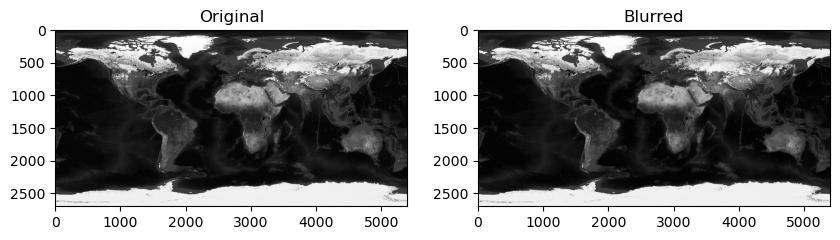

True

In [23]:

# Upload the image
image = cv2.imread('world.jpg', cv2.IMREAD_GRAYSCALE)

# Creating the degraded image 
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

# Plotting
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Blurred")
plt.imshow(blurred_image, cmap='gray')
plt.show()

# Save the images 
cv2.imwrite("original_image.jpg", image)
cv2.imwrite("blurred_image.jpg", blurred_image)


### Histogram Analysis

To assess the overall brightness and tonal distribution of the image, we generate histograms for both the original and blurred versions.

- **What is this step for?**  
  A histogram shows how pixel values (brightness levels) are distributed across the image. It helps identify:
  - Dynamic range
  - Exposure level
  - Contrast spread

- **Why compare blurred and original?**  
  Blurring tends to flatten the image — this is reflected in the histogram as a concentration of pixel values around midtones, with fewer extreme dark or bright values.

- **What we save:**  
  - `original_histogram.png`: Histogram of the sharp image  
  - `blurred_histogram.png`: Histogram of the blurred image


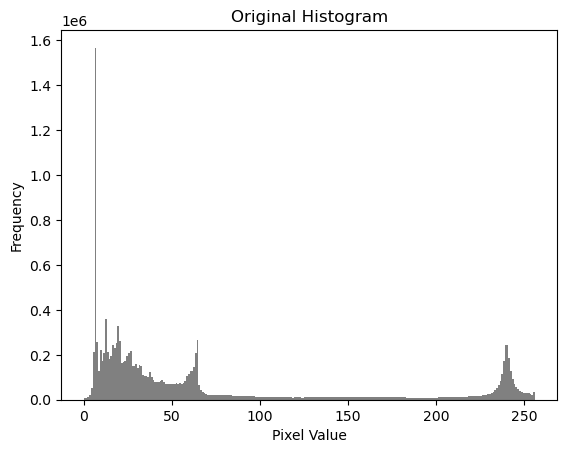

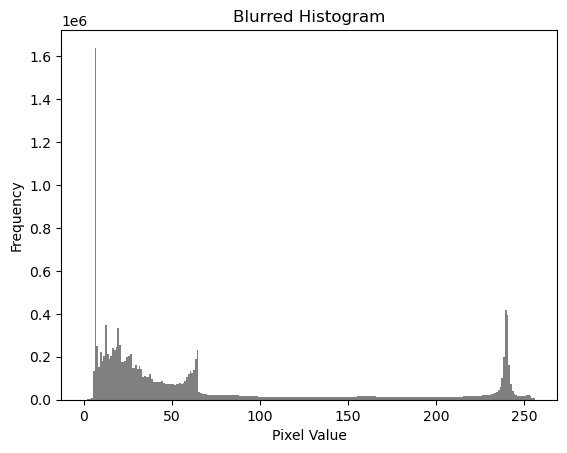

In [24]:
def plot_histogram(img, title,filename):
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.savefig(filename, dpi=300)
    plt.show()
    plt.close()  

plot_histogram(image, "Original Histogram", "original_histogram.png")
plot_histogram(blurred_image, "Blurred Histogram", "blurred_histogram.png")


### Sharpness Measurement (Laplacian Variance)
We evaluate the sharpness of the images using the variance of the Laplacian operator.

- **What is this step for?**  
  The Laplacian operator highlights areas of rapid intensity change, i.e., edges. Calculating the variance of the Laplacian gives a numeric measure of image sharpness:
  - Higher values → more edges → sharper image
  - Lower values → fewer edges → blurred image

- **Why compare original and blurred?**  
  Blurring reduces sharp edges. This should be evident as a drop in Laplacian variance, helping us confirm the effectiveness of the blur.

- **What we calculate:** 
  - Original Image Sharpness
  - Blurred Image Sharpness




In [25]:
def calculate_sharpness(img):
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var

sharpness_original = calculate_sharpness(image)
sharpness_blurred = calculate_sharpness(blurred_image)

print("Original Image Sharpness:", sharpness_original)
print("Blurred Image Sharpness:", sharpness_blurred)


Original Image Sharpness: 630.1299478072594
Blurred Image Sharpness: 4.044661104943807


### Visual Comparison of Sharpness
We display the original and blurred images side-by-side to provide a qualitative assessment of sharpness.

- **What we save:**  
  - comparison_original_vs_blurred.png


In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Blurred")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("comparison_original_vs_blurred.png", dpi=300)
plt.close()


### Canny Edge Detection Analysis
We apply Canny edge detection to both images to analyze edge structures.

- **What is this step for?**  
  Canny detects edges by looking at gradients in intensity. It helps visualize how structural details are preserved or lost after blurring.

- **Why compare blurred and original?**  
  Blurring softens edges, so the number and clarity of detected edges will be reduced in the blurred version. This comparison makes the effect of blur more visible.

- **What we save:**  
  - canny_edge_comparison.png

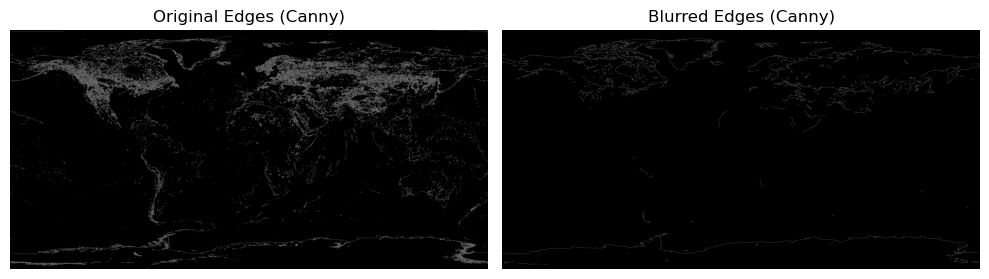

In [27]:
edges_original = cv2.Canny(image, 100, 200)
edges_blurred = cv2.Canny(blurred_image, 100, 200)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Edges (Canny)")
plt.imshow(edges_original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Blurred Edges (Canny)")
plt.imshow(edges_blurred, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("canny_edge_comparison_world.png", dpi=300)
plt.show()


### Sharpness Bar Chart

- **What is this step for?**  
  We visualize the sharpness scores (calculated with Laplacian variance) as a bar chart to compare the numerical difference between the original and blurred images.

- **Why compare blurred and original?**  
  A visual summary helps communicate the sharpness loss more clearly, especially when presenting results.

- **What we save:**  
  - sharpness_bar_chart.png

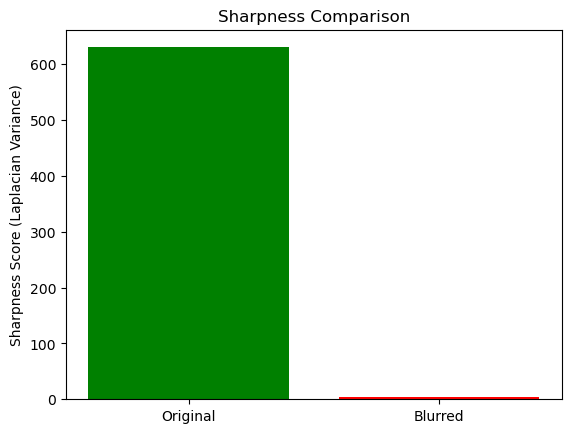

In [28]:
sharpness_scores = [sharpness_original, sharpness_blurred]
labels = ["Original", "Blurred"]

plt.figure()
plt.bar(labels, sharpness_scores, color=["green", "red"])
plt.ylabel("Sharpness Score (Laplacian Variance)")
plt.title("Sharpness Comparison")
plt.savefig("sharpness_bar_chart_world.png", dpi=300)
plt.show()


### Contrast Analysis (Standard Deviation)

- **What is this step for?**  
  Image contrast is quantified using the standard deviation of pixel intensities. A higher standard deviation indicates stronger contrast.

- **Why compare blurred and original?**  
  Blurring generally reduces contrast by smoothing sharp intensity transitions, so a lower standard deviation is expected in the blurred version.

- **What we save:**  
  - contrast_bar_chart.png

Original Contrast: 81.9253402814881
Blurred Contrast: 80.8662711729064


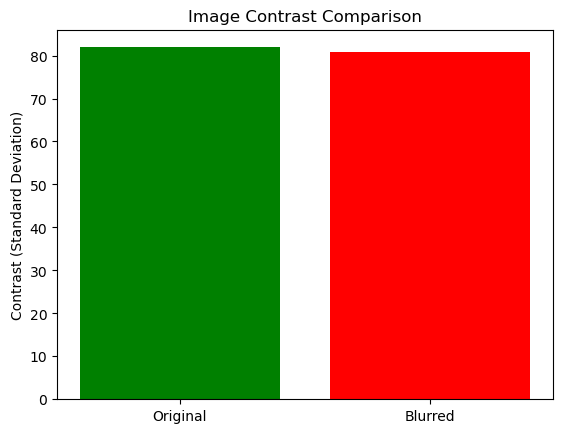

In [29]:
def calculate_contrast(img):
    return img.std()

contrast_original = calculate_contrast(image)
contrast_blurred = calculate_contrast(blurred_image)

print("Original Contrast:", contrast_original)
print("Blurred Contrast:", contrast_blurred)

# Bar chart çiz ve kaydet
plt.figure()
plt.bar(["Original", "Blurred"], [contrast_original, contrast_blurred], color=["green", "red"])
plt.ylabel("Contrast (Standard Deviation)")
plt.title("Image Contrast Comparison")
plt.savefig("contrast_bar_chart_world.png", dpi=300)
plt.show()


### Frequency Domain Analysis (FFT)

- **What is this step for?**  
  Fourier Transform reveals the frequency content of the image. High-frequency components correspond to edges and fine details.

- **Why compare blurred and original?**  
  Blurred images lose high-frequency content. The FFT magnitude spectrum shows this clearly as a reduction in bright patterns.

- **What we save:**  
  - fft_original.png
  - fft_blurred.png

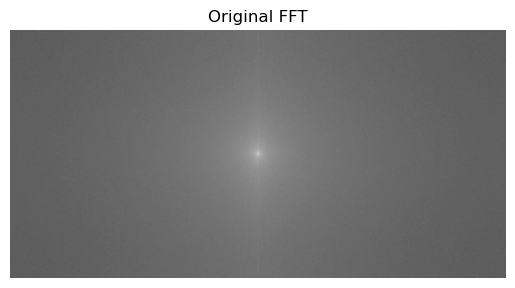

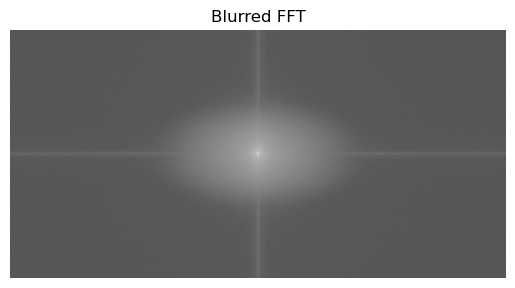

In [30]:

def plot_fft(img, title, filename):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.savefig(filename, dpi=300)
    plt.show()

plot_fft(image, "Original FFT", "fft_original.png")
plot_fft(blurred_image, "Blurred FFT", "fft_blurred.png")


### Peak Signal-to-Noise Ratio (PSNR)

- **What is this step for?**  
  PSNR is a common metric to evaluate the quality degradation between two images. A higher PSNR means the two images are more similar.

- **Why compare blurred and original?**  
  In this case, the original image is treated as the "ground truth", and PSNR quantifies the loss introduced by blurring.

- **What we calculate:**  
  - PSNR value: <number>

In [31]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

print("PSNR:", psnr(image, blurred_image))


PSNR: 35.6353515617393


### Sharpness vs Blur Level Curve

- **What is this step for?**  
  This step evaluates how increasing levels of Gaussian blur affect image sharpness. By applying progressively larger kernels and measuring sharpness (via Laplacian variance), we create a curve showing the degradation.

- **Why compare blurred and original?**  
  It provides insight into the sensitivity of sharpness to blur strength. This can be used to calibrate image processing pipelines or blur detection thresholds.

- **What we save:**  
  - sharpness_vs_blur_curve.png

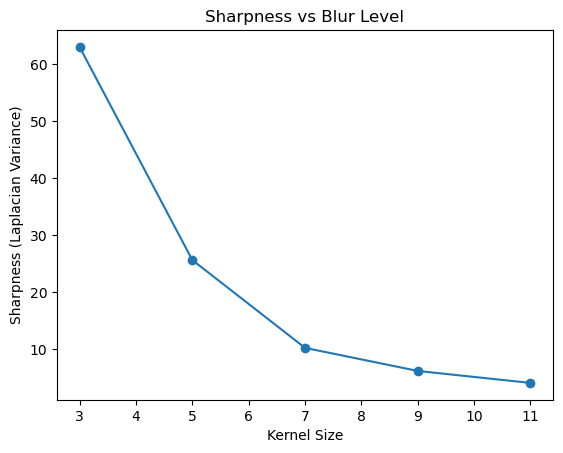

In [32]:
blur_levels = [(3,3), (5,5), (7,7), (9,9), (11,11)]
scores = []

for ksize in blur_levels:
    blurred = cv2.GaussianBlur(image, ksize, 0)
    score = calculate_sharpness(blurred)
    scores.append(score)

plt.plot([k[0] for k in blur_levels], scores, marker='o')
plt.title("Sharpness vs Blur Level")
plt.xlabel("Kernel Size")
plt.ylabel("Sharpness (Laplacian Variance)")
plt.savefig("sharpness_vs_blur_curve_world.png", dpi=300)
plt.show()


In [37]:
pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
    --------------------------------------- 0.3/12.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.8 MB 2.2 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.8 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/12.8 MB 2.1 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.8 MB 2.3 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.8 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 3.7/12.8 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.8 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.8 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.8 MB 2.7 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.8 MB 2.7 MB/s eta 0:00:03
   --------------------- ------------------ 6.8/12.8 MB 2.7 MB/s eta 0:00:03
   ----------

### Structural Similarity Index (SSIM)

- **What is this step for?**  
  SSIM is a perceptual metric that compares two images based on structure, luminance, and contrast. It returns a score between -1 and 1, where:
  - 1 means the images are nearly identical.
  - Closer to 0 means more perceptual difference.

- **Why compare blurred and original?**  
  While PSNR gives a signal-based metric, SSIM provides a perception-based metric — making it more aligned with how humans judge image quality.

- **What we calculate:**  
  - SSIM (Original vs Blurred): <value>

In [33]:
from skimage.metrics import structural_similarity as ssim

ssim_value = ssim(image, blurred_image)
print("SSIM (Original vs Blurred):", ssim_value)


SSIM (Original vs Blurred): 0.8681868093663048


# 🌍 Sentinel-2 Image Quality Evaluation

This project presents a small-scale Image Quality Evaluation (IQE) framework using real Sentinel-2 imagery over the Berlin region. The goal is to assess and compare image quality metrics on a **cloud-free** and a **cloudy** scene of the same area and to understand how atmospheric conditions affect image clarity and contrast.

---

## 📌 Objective

To analyze and compare different image quality metrics:
- ✅ Sharpness (Laplacian Variance)
- ✅ Contrast (Standard Deviation)
- ✅ Histogram Distribution
- ✅ Edge Detection (Canny)
- ✅ Structural Similarity Index (SSIM)
- ✅ Peak Signal-to-Noise Ratio (PSNR)
- ✅ Sharpness vs. Blur Curve

---

## 🛰️ Data Source

Two Sentinel-2 L2A images (downloaded via [Copernicus Data Space](https://dataspace.copernicus.eu)):

- `sentinel2-withoutcloud.jpg`: A cloud-free scene  
- `sentinel2-cloudy.jpg`: A cloudy scene over the same area

The `.SAFE` products were imported into QGIS, visualized in RGB (B4-B3-B2), and exported as `.jpg` for analysis.

---

## 🧪 Methods & Metrics

| Metric                  | Description                                      |
|-------------------------|--------------------------------------------------|
| Sharpness (Laplacian)   | Measures edge clarity using variance of Laplacian |
| Contrast (Std. Dev.)    | Evaluates the spread of pixel brightness         |
| Histogram               | Pixel intensity distribution                     |
| Canny Edges             | Edge visibility and continuity                   |
| SSIM                    | Structural similarity between scenes             |
| PSNR                    | Quantifies pixel-level difference                |
| Sharpness vs Blur Curve | Tests sensitivity to Gaussian blurring          |

All analysis is done in Python using OpenCV, NumPy, Matplotlib, and scikit-image.

---

## 📈 Results Summary

The final comparison of all metrics is summarized in the table below:

| Metric                | Without Clouds | Cloudy Scene |
|-----------------------|----------------|---------------|
| Sharpness (Laplacian) | …              | …             |
| Contrast (Std Dev)    | …              | …             |
| SSIM                  | 1.0            | …             |
| PSNR (dB)             | …              | …             |

*(Full results available in `metrics.csv` or notebook output)*

---

## 📦 Files

# - sentinel2-withoutcloud.jpg
# - sentinel2-cloudy.jpg
# - histogram_clear.png
# - histogram_cloudy.png
# - sharpness_bar_chart_sentinel.png
# - contrast_bar_chart_sentinel.png
# - canny_edges_comparison_sentinel.png
# - fft_clear.png
# - fft_cloudy.png
# - sharpness_vs_blur_curve_sentinel.png
# - iq_metrics_summary.csv


---

## 💬 Notes

- All image processing was done on grayscale versions of the RGB composites.
- The analysis can be extended to include noise simulation, threshold-based classification, or temporal quality tracking.

---

## 📚 Requirements

```bash
pip install opencv-python numpy matplotlib scikit-image pandas


### Sharpness Comparison (Laplacian Variance)

- **What is this step for?**  
  We measure the sharpness of both images using the variance of the Laplacian, a commonly used method in image processing to detect focus and detail.

- **Why compare cloudy and cloud-free images?**  
  Clouds scatter and obscure details in satellite imagery. A lower sharpness score in the cloudy image is expected due to loss of structural content.

- **What we save:**  
  - sharpness_bar_chart.png

In [34]:
# Load Sentinel-2 satellite images in grayscale mode
# Grayscale is sufficient for sharpness and contrast analysis
image_clear = cv2.imread("sentinel2-withoutcloud.jpg", cv2.IMREAD_GRAYSCALE)
image_cloudy = cv2.imread("sentinel2-cloudy.jpg", cv2.IMREAD_GRAYSCALE)

# Define a function to calculate sharpness using Laplacian variance
def calculate_sharpness(img):
    return cv2.Laplacian(img, cv2.CV_64F).var()

sharpness_clear = calculate_sharpness(image_clear)
sharpness_cloudy = calculate_sharpness(image_cloudy)


print("Sharpness (Without Clouds):", sharpness_clear)
print("Sharpness (Cloudy):", sharpness_cloudy)


Sharpness (Without Clouds): 419.3412549114796
Sharpness (Cloudy): 452.4011552406815


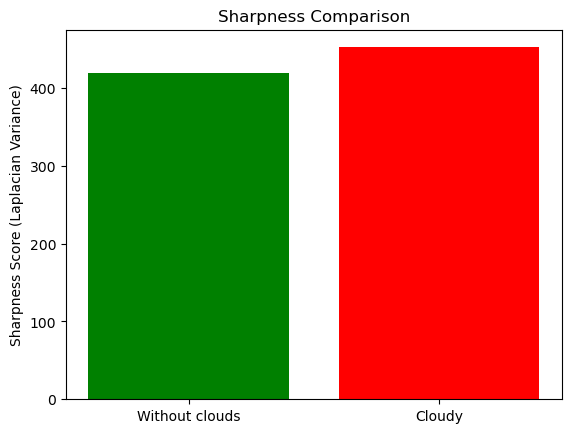

In [35]:
# Prepare the sharpness scores for both cloud-free and cloudy images
sharpness_scores_2 = [sharpness_clear, sharpness_cloudy]
labels = ["Without clouds", "Cloudy"]

plt.figure()
plt.bar(labels, sharpness_scores_2, color=["green", "red"])
plt.ylabel("Sharpness Score (Laplacian Variance)")
plt.title("Sharpness Comparison")
plt.savefig("sharpness_bar_chart_sentinel.png", dpi=300)
plt.show()

### Contrast Comparison (Standard Deviation)

- **What is this step for?**  
  We evaluate contrast by calculating the standard deviation of pixel intensities. Higher standard deviation means stronger contrast.

- **Why compare cloudy and cloud-free images?**  
 Cloud cover tends to flatten the tonal range of an image, leading to lower contrast scores. This helps quantify visual degradation.

- **What we save:**  
  - contrast_bar_chart.png

In [36]:
# Define a function to calculate image contrast using standard deviation
def calculate_contrast(img):
    return img.std()

contrast_clear = calculate_contrast(image_clear)
contrast_cloudy = calculate_contrast(image_cloudy)

print("Contrast (Without Clouds):", contrast_clear)
print("Contrast (Cloudy):", contrast_cloudy)


Contrast (Without Clouds): 97.81482733902203
Contrast (Cloudy): 100.30383378859197


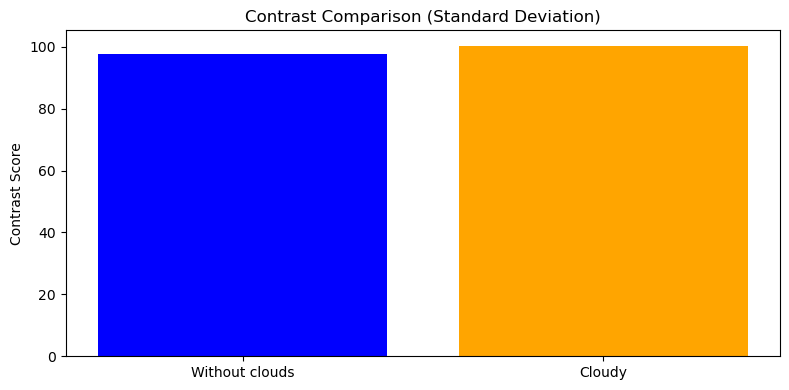

In [37]:
# Prepare contrast scores for both clear and cloudy images
contrast_scores = [contrast_clear, contrast_cloudy]

# Plot a bar chart to visually compare contrast levels (standard deviation)
plt.figure(figsize=(8, 4))
plt.bar(labels, contrast_scores, color=["blue", "orange"])
plt.title("Contrast Comparison (Standard Deviation)")
plt.ylabel("Contrast Score")            # Standard deviation of pixel intensities
plt.tight_layout()
plt.savefig("contrast_bar_chart_sentinel.png", dpi=300)
plt.show()


### Histogram Analysis

- **What is this step for?**  
  Histograms show the distribution of pixel values across the grayscale image, offering insight into dynamic range and exposure.

- **Why compare cloudy and cloud-free images?**  
 A cloudy image will typically show a histogram concentrated in midtones, with fewer dark shadows or bright highlights — indicating loss of visual diversity.

- **What we save:**  
  - histogram_clear.png
  - histogram_cloudy.png

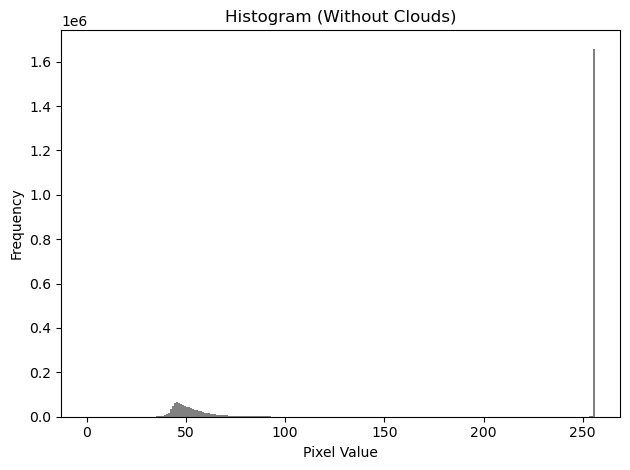

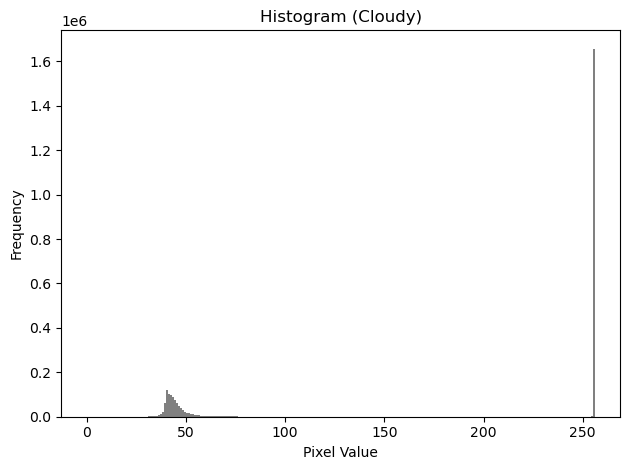

In [38]:
# Define a function to plot and save a grayscale histogram of an image
def plot_histogram(img, title, filename):
    plt.figure()

    # Use ravel() to flatten the image into a 1D array of pixel values
    # bins=256 → one bin per gray level (0 to 255)
    # range=(0, 256) ensures full 8-bit range is captured
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

plot_histogram(image_clear, "Histogram (Without Clouds)", "histogram_clear.png")
plot_histogram(image_cloudy, "Histogram (Cloudy)", "histogram_cloudy.png")


### Canny Edge Detection

- **What is this step for?**  
  Canny edge detection is used to visualize edge structures and fine details. It's especially useful for structural comparison.

- **Why compare cloudy and cloud-free images?**  
 Cloud cover reduces edge clarity. This comparison highlights how much edge information is lost due to atmospheric interference.

- **What we save:**  
  - canny_edges_comparison.png

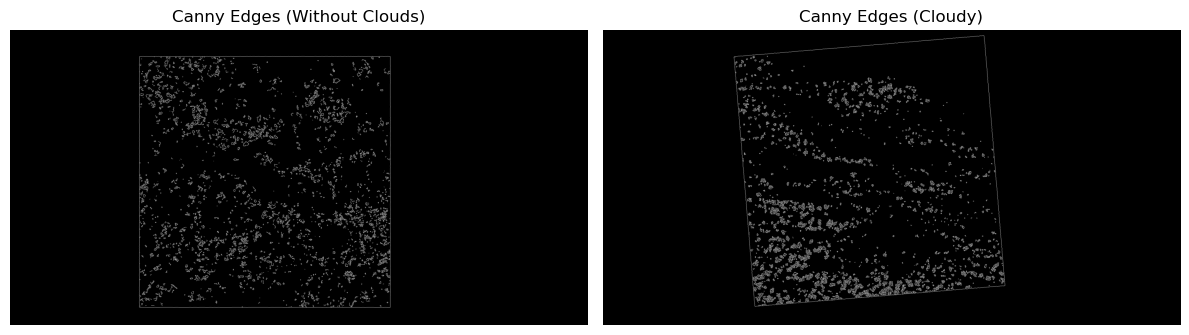

In [39]:
# Apply Canny edge detection to both the cloud-free and cloudy satellite images
# Thresholds (100, 200) define gradient intensity limits for edge detection
edges_clear = cv2.Canny(image_clear, 100, 200)
edges_cloudy = cv2.Canny(image_cloudy, 100, 200)

# Create a side-by-side comparison of edge maps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Canny Edges (Without Clouds)")
plt.imshow(edges_clear, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Canny Edges (Cloudy)")
plt.imshow(edges_cloudy, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.savefig("canny_edges_comparison_sentinel.png", dpi=300)
plt.show()


### Structural Similarity (SSIM)

- **What is this step for?**  
  SSIM evaluates similarity based on structure, contrast, and luminance. It’s a perceptual metric. It evaluates how similar images look to the human eye.

- **Why compare cloudy and cloud-free images?**  
 A lower SSIM score indicates that cloud cover has introduced significant structural differences.

- **What we calculate:**  
  - SSIM (Without Clouds vs Cloudy): <value>

In [40]:
# Assign the clear and cloudy images for structural similarity comparison
image1 = image_clear
image2 = image_cloudy

# Compute SSIM (Structural Similarity Index)
ssim_score, _ = ssim(image1, image2, full=True)         # The 'full=True' option returns both the score and the similarity map

# Print the SSIM value
# Range: -1 to 1 → 1 means identical, values closer to 0 indicate major differences
print("SSIM (Without Clouds vs Cloudy):", ssim_score)


SSIM (Without Clouds vs Cloudy): 0.7854698656287943


### Peak Signal-to-Noise Ratio (PSNR)

- **What is this step for?**  
  PSNR estimates visual quality degradation by comparing signal strength to noise. Higher is better.

- **Why compare cloudy and cloud-free images?**  
 To quantify how much quality is lost due to clouds.

- **What we calculate:**  
  - PSNR: <value>

In [41]:
# Define a function to calculate Peak Signal-to-Noise Ratio (PSNR) between two images
def psnr(img1, img2):
    # Mean Squared Error (MSE) quantifies the average squared difference between the images
    mse = np.mean((img1 - img2) ** 2)

    # If the images are identical, MSE is zero, PSNR is infinite (perfect match)
    if mse == 0:
        return float('inf') 
    
    # Assume 8-bit grayscale images with maximum pixel value of 255 (0-255)
    PIXEL_MAX = 255.0

    # PSNR formula: higher values mean the images are more similar (less degradation)
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Compute PSNR between the cloud-free and cloudy satellite images
# This measures how much visual degradation is introduced by clouds
psnr_score = psnr(image_clear, image_cloudy)

# Print the result 
print("PSNR (Without Clouds vs Cloudy):", psnr_score)


PSNR (Without Clouds vs Cloudy): 33.24065910482076


### Frequency Analysis (FFT)

- **What is this step for?**  
  The Fourier Transform reveals frequency content of an image — high-frequency details like edges vs low-frequency smooth regions.

- **Why compare cloudy and cloud-free images?**  
 The cloudy image should show reduced high-frequency content, indicating detail loss.

- **What we save:**  
  - fft_clear.png
  - fft_cloudy.png

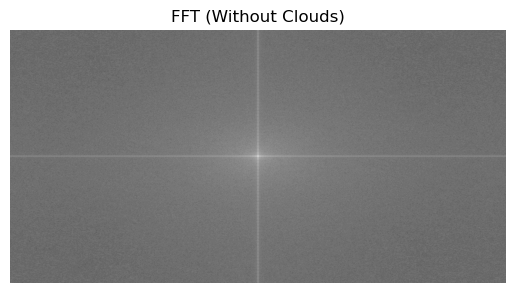

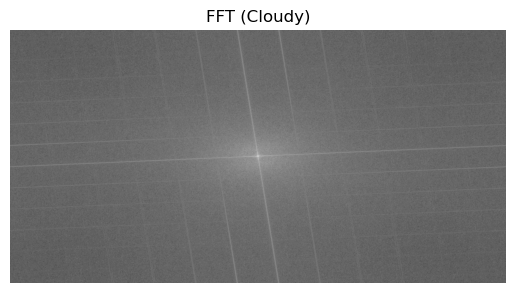

In [42]:
# Define a function to compute and visualize the 2D Fourier Transform of an image
def plot_fft(img, title, filename):
    # Compute the 2D Fast Fourier Transform of the image
    f = np.fft.fft2(img)            # Converts the image to frequency domain

    # Shift the zero frequency component to the center for better visualization
    fshift = np.fft.fftshift(f)

    # Calculate the magnitude spectrum (in log scale to enhance visibility)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))        # Because frequency magnitudes are too large to display linearly, log is used.

    # Plot and save
    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.savefig(filename, dpi=300)
    plt.show()

# Apply FFT analysis to both the cloud-free and cloudy images
# This helps visualize how cloud cover affects high-frequency (detail) content
plot_fft(image_clear, "FFT (Without Clouds)", "fft_clear.png")
plot_fft(image_cloudy, "FFT (Cloudy)", "fft_cloudy.png")


### Blur-Level vs Sharpness Curve (on Clear Image)

- **What is this step for?**  
  Simulating artificial blur on the clear image shows how blur affects sharpness in a controlled way.

- **Why compare cloudy and cloud-free images?**  
  Establishes a baseline for what blur-induced degradation looks like, to compare with cloud-induced effects.

- **What we save:**  
  - sharpness_vs_blur_curve.png

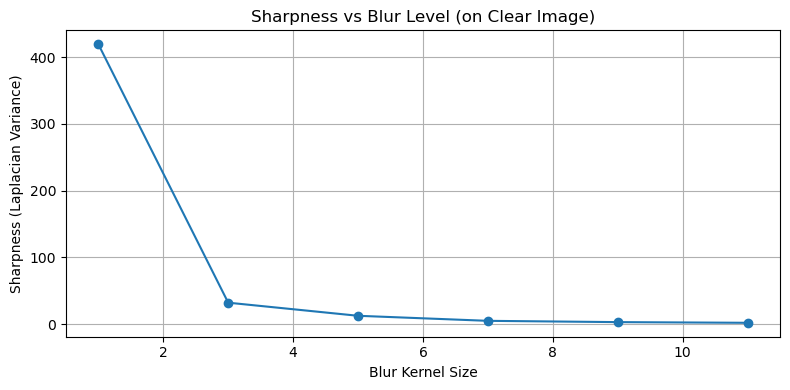

In [43]:

# Define different blur levels using increasing Gaussian kernel sizes
# Larger kernels result in heavier blur (more smoothing)
blur_levels = [(1, 1), (3, 3), (5, 5), (7, 7), (9, 9), (11, 11)]            # kernel size increases to simulate progressive blur
sharpness_scores = []

# For each blur level, apply Gaussian blur and calculate sharpness using Laplacian variance
for ksize in blur_levels:
    blurred = cv2.GaussianBlur(image_clear, ksize, 0)
    score = cv2.Laplacian(blurred, cv2.CV_64F).var()                        # quantifies sharpness through edge strength
    sharpness_scores.append(score)

# Extract the kernel sizes (1, 3, 5, ...) for x-axis labeling
x_labels = [k[0] for k in blur_levels]

# Plot the relationship between blur strength and sharpness
# This helps visualize how image detail degrades with increasing blur
plt.figure(figsize=(8, 4))
plt.plot(x_labels, sharpness_scores, marker='o')
plt.title("Sharpness vs Blur Level (on Clear Image)")
plt.xlabel("Blur Kernel Size")
plt.ylabel("Sharpness (Laplacian Variance)")
plt.grid(True)
plt.tight_layout()
plt.savefig("sharpness_vs_blur_curve_sentinel.png", dpi=300)
plt.show()


### IQ Metrics Summary Table

- **What is this step for?**  
  This summary table provides a quick comparison of key image quality metrics between the two satellite images.

- **Metrics included:**  
  - Sharpness (Laplacian)
  - Contrast (Standard Deviation)
  - SSIM
  - PSNR
  
- **What we save:**  
  - iq_metrics_summary.csv

In [44]:
# Prepare a dictionary of key image quality metrics
data = {
    "Metric": [
        "Sharpness (Laplacian)",    # Measures overall image detail
        "Contrast (Std Dev)",       # Measures dynamic range/spread of pixel values
        "SSIM",                     # Structural similarity (perceptual quality)
        "PSNR (dB)"                 # Signal-to-noise ratio (image degradation)
    ],
    "Without Clouds": [
        sharpness_clear,
        contrast_clear,
        1.0,                        # SSIM of a reference image to itself is always 1.0 (perfect match)
        psnr_score                  # Comparing clear image with cloudy, shows degradation level
    ],
    "Cloudy": [
        sharpness_cloudy,
        contrast_cloudy,
        ssim_score,                 # Actual SSIM between clear and cloudy images (should be <1)
        psnr_score                  # PSNR between clear and cloudy; repeated for consistency
    ]
}

# Create a pandas DataFrame from the metrics
df_metrics = pd.DataFrame(data)

# Save the summary to CSV for reporting or analysis
df_metrics.to_csv("iq_metrics_summary.csv", index=False)

# Print the results
print("IQ Metrics summary saved as iq_metrics_summary.csv")
print(df_metrics)


IQ Metrics summary saved as iq_metrics_summary.csv
                  Metric  Without Clouds      Cloudy
0  Sharpness (Laplacian)      419.341255  452.401155
1     Contrast (Std Dev)       97.814827  100.303834
2                   SSIM        1.000000    0.785470
3              PSNR (dB)       33.240659   33.240659
